In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Loading the dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
pwd

'C:\\Users\\osama'

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
rosses=list(data_dir.glob('roses/*'))
rosses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

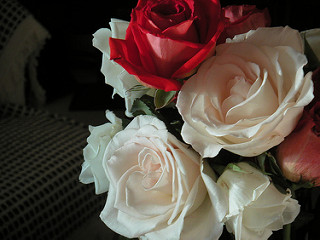

In [10]:
PIL.Image.open(str(rosses[1]))

In [11]:
tulip=list(data_dir.glob('tulips/*'))
tulip[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

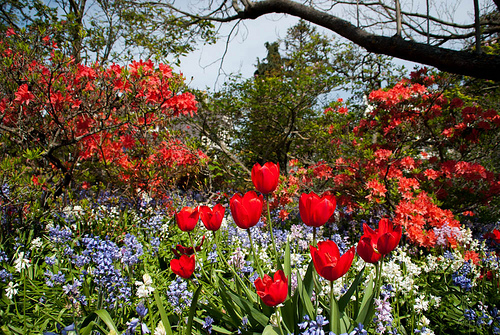

In [12]:
PIL.Image.open(str(tulip[5]))

### Read flowers images from disk into numpy array using opencv

In [13]:
flowers_images_dict= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [16]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [18]:
img.shape

(240, 179, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X,y=[],[]

for flower_name, images in  flowers_images_dict.items():
    for img in images:
        img=cv2.imread(str(img))
        resized_image=cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X=np.array(X)
y=np.array(y)

### Train_test_split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [23]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build Convolutional Neural Netwaork and train it

In [24]:
num_classes=5
model =Sequential([
    layers.Conv2D(16, 3, padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 44s 517ms/step - loss: 1.4546 - accuracy: 0.3790
Epoch 2/30
86/86 [==============================] - 42s 491ms/step - loss: 1.0309 - accuracy: 0.5934
Epoch 3/30
86/86 [==============================] - 42s 485ms/step - loss: 0.8434 - accuracy: 0.6748
Epoch 4/30
86/86 [==============================] - 42s 488ms/step - loss: 0.6260 - accuracy: 0.7642
Epoch 5/30
86/86 [==============================] - 42s 488ms/step - loss: 0.4274 - accuracy: 0.8517
Epoch 6/30
86/86 [==============================] - 42s 493ms/step - loss: 0.2660 - accuracy: 0.9139
Epoch 7/30
86/86 [==============================] - 43s 495ms/step - loss: 0.1559 - accuracy: 0.9535
Epoch 8/30
86/86 [==============================] - 42s 488ms/step - loss: 0.1012 - accuracy: 0.9717
Epoch 9/30
86/86 [==============================] - 42s 484ms/step - loss: 0.0915 - accuracy: 0.9727
Epoch 10/30
86/86 [==============================] - 43s 494ms/step - loss: 0.0684 - accura

In [26]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 4s 136ms/step - loss: 867.3998 - accuracy: 0.5593


[867.3997802734375, 0.5592672228813171]

In [27]:
pred=model.predict(X_test)
pred

array([[ 1913.4576  ,  8041.5874  ,   105.658295, -7416.436   ,
        -2664.8025  ],
       [ 3187.2097  ,   -85.97157 , -5165.0684  , -2553.0706  ,
         2225.6626  ],
       [-1134.5812  ,  2106.1448  ,  2213.4353  , -1930.9011  ,
          -16.56202 ],
       ...,
       [   92.89606 ,  -361.04694 , -2550.9922  ,  1044.1714  ,
         2095.1604  ],
       [  283.03366 ,  1813.4564  , -2184.68    ,  1371.3164  ,
        -1993.7059  ],
       [  738.25775 , -3066.4255  ,  -347.98886 ,  1719.4777  ,
         1773.6792  ]], dtype=float32)

In [28]:
score=tf.nn.softmax(pred[0])

In [29]:
np.argmax(score)

1

In [30]:
y_test[0]

1

### Improves Test Accuracy using Data Augmentation

In [32]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0,1),
])

#### Orignal Image

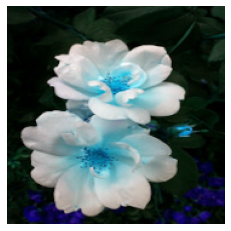

In [33]:
plt.axis('off')
plt.imshow(X[0])

#### Newly generated training sample using data augmentation

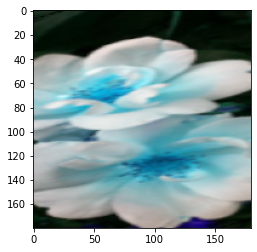

In [34]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [35]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 52s 606ms/step - loss: 1.2549 - accuracy: 0.4731
Epoch 2/30
86/86 [==============================] - 50s 580ms/step - loss: 1.0353 - accuracy: 0.6010
Epoch 3/30
86/86 [==============================] - 45s 519ms/step - loss: 0.9464 - accuracy: 0.6265
Epoch 4/30
86/86 [==============================] - 45s 520ms/step - loss: 0.8786 - accuracy: 0.6490
Epoch 5/30
86/86 [==============================] - 44s 515ms/step - loss: 0.8487 - accuracy: 0.6799
Epoch 6/30
86/86 [==============================] - 47s 547ms/step - loss: 0.7891 - accuracy: 0.6973
Epoch 7/30
86/86 [==============================] - 45s 523ms/step - loss: 0.7810 - accuracy: 0.6969
Epoch 8/30
86/86 [==============================] - 45s 525ms/step - loss: 0.7758 - accuracy: 0.7064
Epoch 9/30
86/86 [==============================] - 46s 531ms/step - loss: 0.7131 - accuracy: 0.7315
Epoch 10/30
86/86 [==============================] - 47s 542ms/step - loss: 0.7030 - accura

In [36]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 97ms/step - loss: 0.7768 - accuracy: 0.7288


[0.7768027186393738, 0.7287581562995911]